In [127]:
%load_ext autoreload
%autoreload 2

# standard
import sys
import os

# env specific
import numpy as np
import scipy.linalg as linalg
import cv2

import matplotlib.pyplot as plt
from matplotlib import rcParams

# custom
sys.path.append('e:\\Dropbox\\py_projects\\signal\\signal')
# print(sys.path)
import src.signallib as sl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
titlefont = 'Gill Sans MT'
mainfont = 'Arial'
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = [mainfont, titlefont]

rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'
rcParams['axes.titlesize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

## Data Partition
Split images into train, validation, and test sets

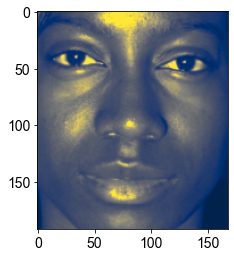

In [131]:
face = 'yaleB22'
image_filepath = f'E:/CroppedYale/{face}/'
image_filename = f'{face}_P00_Ambient.pgm'
image_filename = f'{face}_P00A+005E-10.pgm'

img_test = cv2.imread( image_filepath+image_filename, -1)

plt.imshow(img_test, cmap='cividis')

In [140]:
type(img_test[1,1])

numpy.uint8

In [103]:
image_filepath = f'E:/CroppedYale/'
# each folder contains images for one model
image_keys = [ s[-2:] for s in os.listdir(image_filepath) ]
# all folders have this prefix
image_key_filepath_prefix = 'yaleB'

# init RNG
rng = np.random.default_rng(seed=7)
# init train, valid, test file names lists
train_fns = []
valid_fns = []
test_fns = []
# how many images in validation and test sets per model
nvalid_per_key = 2
ntest_per_key = 1

# create lists of filenames for each set
for k in image_keys:
   # fns in model folder
   fns = os.listdir(image_filepath+image_key_filepath_prefix+k)
   # ambient is sometimes not useful, discard non-PGM files
   fns = [fn for fn in fns if ('.pgm' in fn)&('Ambient' not in fn)]
   
   nfns = len(fns)
   # shuffle the image names
   fns_permute = rng.choice(nfns, nfns, replace=False)

   # select image names for each data set
   train_fns += [ image_key_filepath_prefix + k + '/' + fns[i] 
                  for i 
                  in fns_permute[:-(nvalid_per_key+ntest_per_key)]
               ]
   valid_fns += [ image_key_filepath_prefix + k + '/' + fns[i] 
                  for i
                  in fns_permute[-(nvalid_per_key+ntest_per_key):-ntest_per_key] 
               ]
   test_fns += [ image_key_filepath_prefix + k + '/' + fns[i] 
                  for i 
                  in fns_permute[-ntest_per_key:]
               ]
    

## Load and Reshape Training Data

In [141]:
def load_img_vector( filepath ):
    img = cv2.imread( filepath, flags=cv2.IMREAD_GRAYSCALE)
    imgvec = np.reshape(img, (-1, ))
    return imgvec

# base path to images
image_filepath = f'E:/CroppedYale/'

# rows and columns of the images
NROWS = 192
NCOLS = 168
# number of training images
NTRAIN = len(train_fns)

# init X matrix
train_X = np.zeros([NROWS*NCOLS, NTRAIN], dtype=np.uint8)

for i, fn in enumerate(train_fns):
    imgvec = load_img_vector( image_filepath+fn )
    train_X[:,i] = imgvec

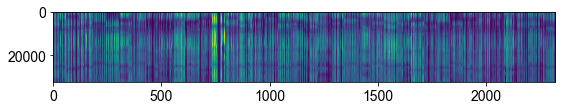

In [142]:
fig,ax = plt.subplots(figsize=(9,12))
ax.imshow(train_X, aspect=0.01)

## SVD

In [144]:
umat, svals, vmat = linalg.svd( train_X, full_matrices=False, check_finite=False)

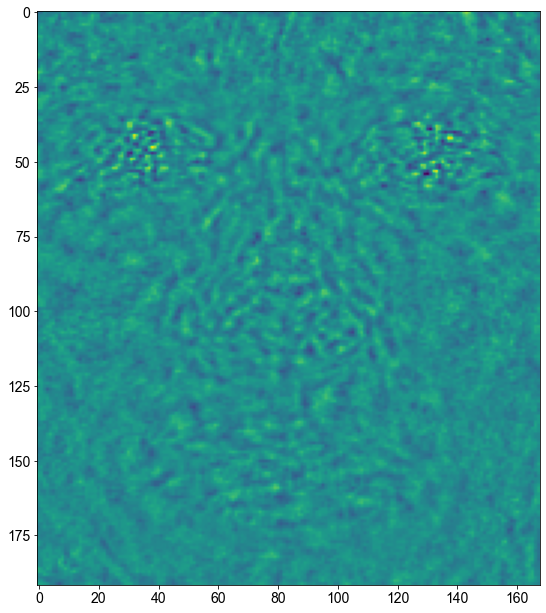

In [152]:
fig,ax = plt.subplots(figsize=(9,12))
ax.imshow(np.reshape(umat[:,1100],[NROWS, NCOLS]))

In [150]:
umat.shape

(32256, 2318)